# Numerical Data

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/titanic-toy/titanic_toy.csv",usecols=['Age','Fare','Survived'])

In [3]:
df.head(3)

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1


In [4]:
df.isnull().mean() * 100 

Age         19.865320
Fare         5.050505
Survived     0.000000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,NaN,29.0


In [10]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [11]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([16.  ,  6.  , 33.  , 66.  , 70.  , 31.  , 36.  , 24.  , 31.  ,
       23.  , 25.  , 35.  , 27.  , 11.  , 18.  , 29.  , 31.  , 24.  ,
       31.  , 39.  , 51.  , 34.  , 21.  , 27.  , 14.  ,  4.  , 11.  ,
       45.  , 28.  , 58.  ,  4.  , 31.  ,  4.  , 22.  , 21.  ,  0.83,
       31.  , 39.  ,  0.75, 34.  , 24.  , 42.  , 19.  , 32.  , 23.  ,
       32.  , 29.  , 25.  , 21.  , 33.  , 18.  , 32.  , 19.  , 30.  ,
       18.  , 23.  , 30.  ,  6.  , 29.  , 36.  , 43.  , 17.  , 16.  ,
       25.  , 56.  , 35.  , 14.  , 30.  , 18.  , 62.  , 44.  , 52.  ,
       24.  , 30.  , 40.  , 28.  , 47.  , 45.5 , 36.5 , 39.  , 17.  ,
       29.  , 30.  , 62.  , 20.  , 27.  , 35.  , 34.  , 25.  , 37.  ,
       24.  ,  1.  , 35.  , 33.  , 49.  , 21.  , 22.  , 28.  ,  7.  ,
       27.  , 17.  , 29.  , 21.  ,  2.  , 40.5 , 54.  , 30.  , 19.  ,
       71.  , 21.  ,  2.  , 34.5 , 33.  , 50.  , 58.  , 22.  , 45.  ,
       45.  , 16.  , 19.  , 19.  , 44.  , 25.  , 18.  , 24.  , 27.  ,
       33.  , 37.  ,

In [12]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

/tmp/ipykernel_18/4072170967.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
/tmp/ipykernel_18/4072170967.py:2: 

In [13]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,62.0
493,71.0,49.5042,71.0
527,NaN,221.7792,21.0


/tmp/ipykernel_18/2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-leve

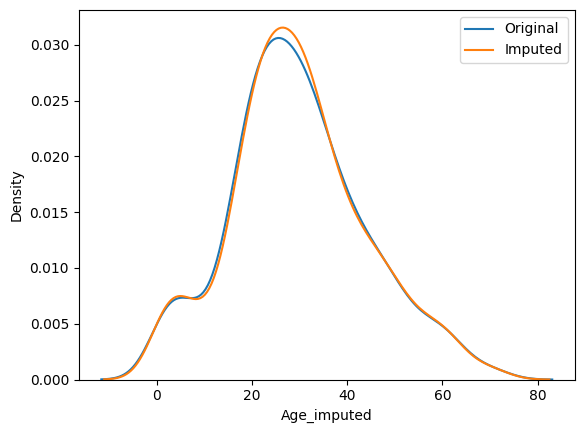

In [14]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [15]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  202.7884162895668


In [16]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2448.197914,70.719262,48.673707
Age,70.719262,204.349513,204.349513
Age_imputed,48.673707,204.349513,202.788416


<Axes: >

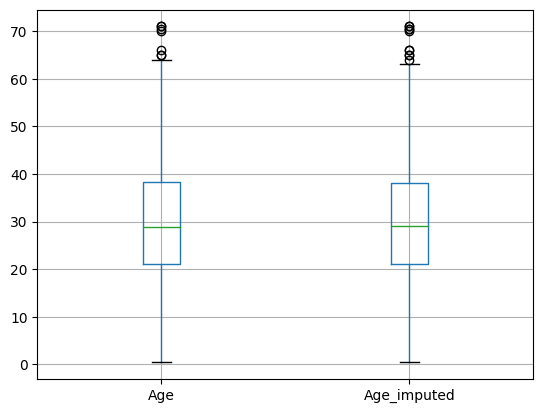

In [17]:
X_train[['Age', 'Age_imputed']].boxplot()

In [18]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(df['Fare']))

# Catagorical Data

In [19]:
data = pd.read_csv('/kaggle/input/train1/train1.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [20]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [21]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [22]:
X = data
y = data['SalePrice']

In [23]:
X

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [26]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
613,NaN,NaN,147000,NaN,NaN
574,NaN,TA,139000,TA,NaN
44,NaN,TA,141000,TA,NaN
55,Gd,TA,180500,TA,Gd
700,Gd,TA,312500,TA,Gd
